In [28]:
path = 'C:/Users/ISHMO_CT/Downloads/my-projects/NUERAL_ENV/Loan-Approval-Prediction/playground-series-s4e10/train.csv'

In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv(path)

In [31]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [32]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [33]:
df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [34]:
# Group by loan intent and calculate mean loan ammount 
print(df.groupby('loan_intent')['loan_amnt'].mean())

loan_intent
DEBTCONSOLIDATION     9150.314793
EDUCATION             9051.681363
HOMEIMPROVEMENT      10224.007962
MEDICAL               8819.990397
PERSONAL              9239.801318
VENTURE               9262.830886
Name: loan_amnt, dtype: float64


In [35]:
print(df[(df['loan_grade']=='A') & (df['loan_status']==0)])

          id  person_age  person_income person_home_ownership  \
2          2          29          28800                   OWN   
4          4          22          60000                  RENT   
5          5          27          45000                  RENT   
6          6          25          45000              MORTGAGE   
15        15          29          33000                   OWN   
...      ...         ...            ...                   ...   
58631  58631          22          50000                  RENT   
58633  58633          35          30000                  RENT   
58634  58634          30          85000              MORTGAGE   
58639  58639          22          70000                  RENT   
58643  58643          22          30000                  RENT   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
2                    8.0           PERSONAL          A       6000   
4                    2.0            MEDICAL          A       6000   
5           

In [36]:
# Correlation between numerical columns 
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
print(corr_matrix)

                                  id  person_age  person_income  \
id                          1.000000    0.008608      -0.001896   
person_age                  0.008608    1.000000       0.102176   
person_income              -0.001896    0.102176       1.000000   
person_emp_length           0.005376    0.121276       0.164042   
loan_amnt                  -0.000403    0.050378       0.310942   
loan_int_rate              -0.003454    0.009653      -0.057611   
loan_percent_income        -0.002677   -0.031975      -0.280314   
cb_person_cred_hist_length  0.008139    0.874260       0.082727   
loan_status                -0.008138   -0.001130      -0.169956   

                            person_emp_length  loan_amnt  loan_int_rate  \
id                                   0.005376  -0.000403      -0.003454   
person_age                           0.121276   0.050378       0.009653   
person_income                        0.164042   0.310942      -0.057611   
person_emp_length            

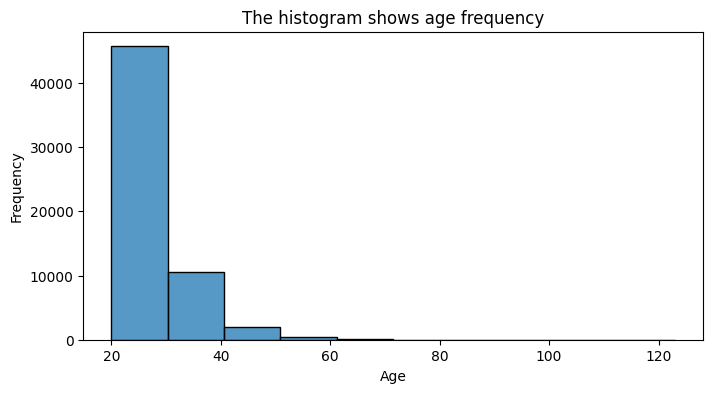

In [37]:
# distribution of person's age 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['person_age'], bins=10)
plt.title("The histogram shows age frequency")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

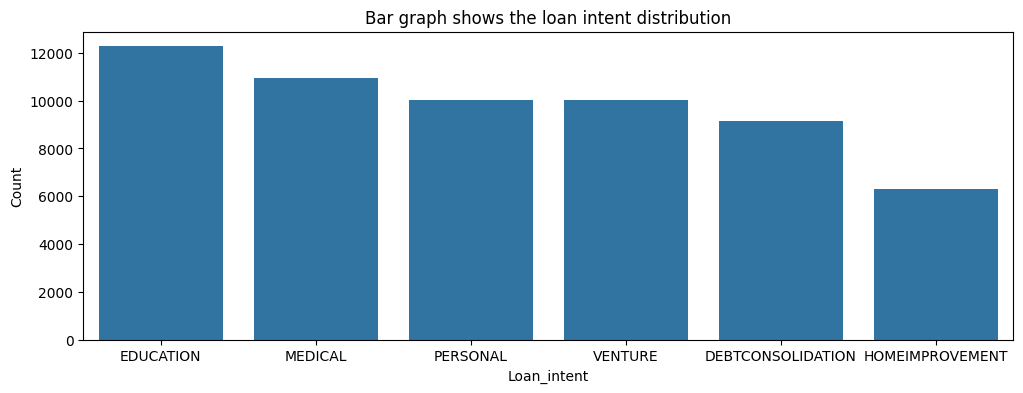

In [38]:
# Bar graph for loan intent 
plt.figure(figsize=(12,4))
sns.countplot(x = 'loan_intent', data=df)
plt.title('Bar graph shows the loan intent distribution')
plt.xlabel('Loan_intent')
plt.ylabel('Count')
plt.show()

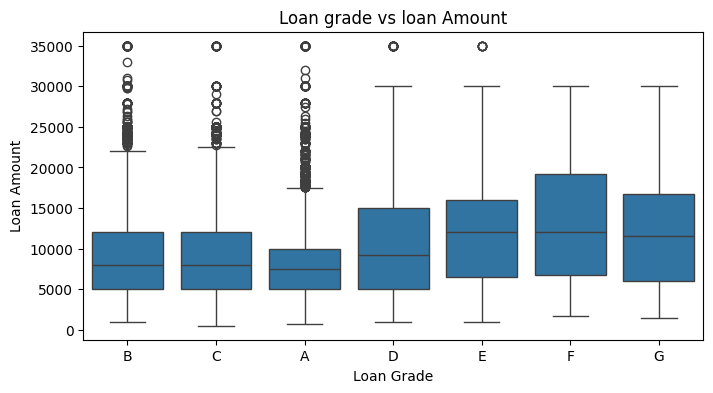

In [39]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='loan_grade', y='loan_amnt', data=df)
plt.title("Loan grade vs loan Amount")
plt.xlabel('Loan Grade')
plt.ylabel('Loan Amount')
plt.show()

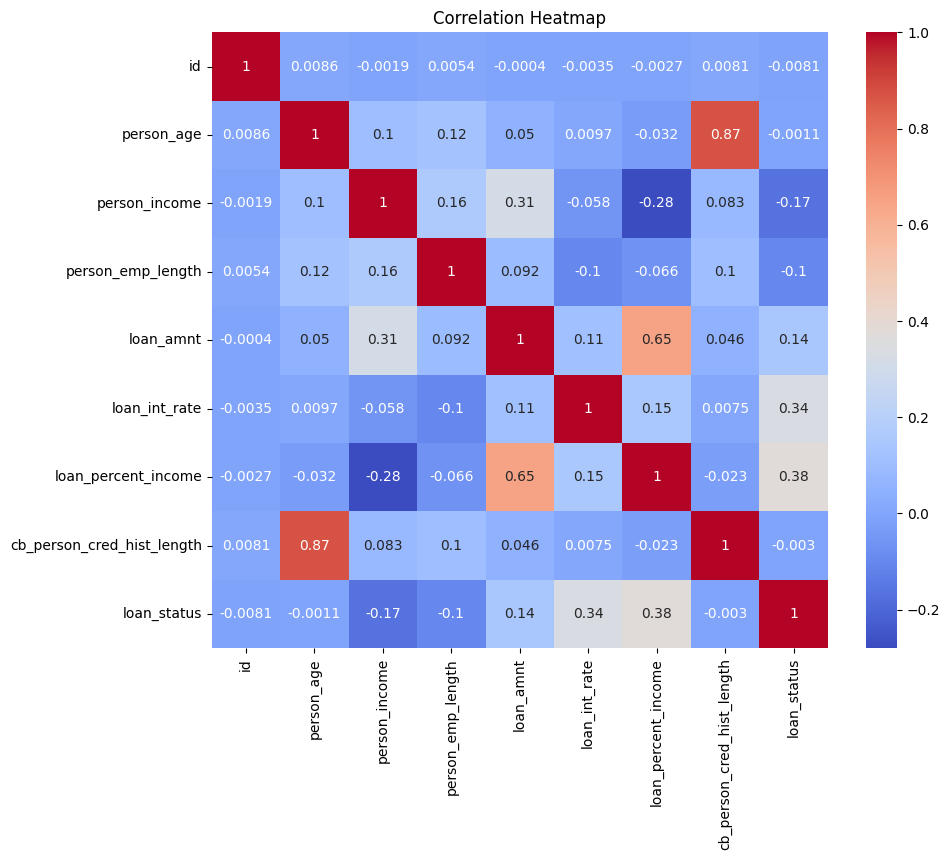

In [40]:
# correlation heat map 
corr_matrix = df.select_dtypes(include=['int64', 'float64',]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [42]:
# drop the id column 
df = df.drop(columns='id')

In [43]:
# split the data 
target = 'loan_status'
X = df.drop(columns=target)
y = df[target]

In [44]:
# get the train and validation data set 
from sklearn.model_selection import train_test_split
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [45]:
# Baseline 
baseline_acc = y_train.value_counts(normalize=True).max()
print(baseline_acc)

0.8574081091322471


In [46]:
# Build the models
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.impute import SimpleImputer


model_lr = make_pipeline(
    OneHotEncoder(),
    LogisticRegression()
)

model_rf = make_pipeline(
    OneHotEncoder(),
    RandomForestClassifier(),
)

model_dt = make_pipeline(
    OneHotEncoder(),
    DecisionTreeClassifier()
)

In [47]:
# fit the models 

model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_dt.fit(X_train, y_train)

c:\Users\ISHMO_CT\.virtualenvs\nueral_env-PneuDF7g\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['person_home_ownership', 'loan_intent',
                                     'loan_grade',
                                     'cb_person_default_on_file'])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [48]:
# Get the model accurancy 
model_lr_acc = model_lr.score(X_train, y_train)
model_rf_acc = model_rf.score(X_train, y_train)
model_dt_acc = model_dt.score(X_train, y_train)
print(model_lr_acc)
print(model_rf_acc)
print(model_dt_acc)

0.8825691549829481
0.9998863205759757
1.0


Logistic Regression Calculations:                     
                                                       
Hypothesis Function:                                   
                                          
h(x) = 1 / (1 + e^(-z))                                

z = w0 + w1*x1 + w2*x2 + ... + wn\*xn

x is the input feature vector, w is the weight vector.

Cost Function (Log Loss):

J(w) = -[y*log(h(x)) + (1-y)*log(1-h(x))]

y is the true label (0 or 1).

In [49]:
# we apply hyperparameters 
param_grid_lr = {
    'logisticregression__max_iter': [200, 300],
    'logisticregression__C': [0.01, 0.1, 1]
}

param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200, 500],
    'randomforestclassifier__criterion': ['gini', 'entropy'],
    'randomforestclassifier__max_depth': [5, 10, 15],
}

param_grid_dt = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [5, 10, 15],
}


In [50]:
from sklearn.model_selection import GridSearchCV
model_lr_gs = GridSearchCV(model_lr, param_grid_lr, n_jobs=-1, cv=5, verbose=1)
model_rf_gs = GridSearchCV(model_rf, param_grid_rf, n_jobs=-1, cv=5, verbose=1)
model_dt_gs = GridSearchCV(model_dt, param_grid_dt, n_jobs=-1, cv=5, verbose=1)

In [51]:
# lets fit using the model with parameters 
model_lr_gs.fit(X_train, y_train)
model_rf_gs.fit(X_train, y_train)
model_dt_gs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\ISHMO_CT\.virtualenvs\nueral_env-PneuDF7g\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('onehotencoder',
                                        OneHotEncoder(cols=['person_home_ownership',
                                                            'loan_intent',
                                                            'loan_grade',
                                                            'cb_person_default_on_file'])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [5, 10, 15]},
             verbose=1)

In [52]:
model_lr_gs_acc = model_lr_gs.score(X_train, y_train)
model_rf_gs_acc = model_rf_gs.score(X_train, y_train)
model_dt_gs_acc = model_dt_gs.score(X_train, y_train)
print(model_lr_gs_acc)
print(model_rf_gs_acc)
print(model_dt_gs_acc)

0.9007389162561577
0.9633383857521789
0.9558165971959075


In [53]:
# find the best parameters 
print("best parameter_logistic regression", model_lr_gs.best_estimator_)
print("best parameter_rain forest", model_rf_gs.best_estimator_)
print("best parameter_decision_tree", model_dt_gs.best_estimator_)

best parameter_logistic regression Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['person_home_ownership', 'loan_intent',
                                     'loan_grade',
                                     'cb_person_default_on_file'])),
                ('logisticregression', LogisticRegression(C=1, max_iter=300))])
best parameter_rain forest Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['person_home_ownership', 'loan_intent',
                                     'loan_grade',
                                     'cb_person_default_on_file'])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=15,
                                        n_estimators=200))])
best parameter_decision_tree Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['person_home_ownership', 'loan_intent',
                                     'loan_grade',
                          

In [54]:
# lets try it on validation data. 

model_lr_gs_acc_validation_set = model_lr_gs.score(X_text, y_test)
model_rf_gs_acc_validation_set = model_rf_gs.score(X_text, y_test)
model_dt_gs_acc_validation_set = model_dt_gs.score(X_text, y_test)
print(model_lr_gs_acc_validation_set)
print(model_rf_gs_acc_validation_set)
print(model_dt_gs_acc_validation_set)



0.8959931798806479
0.9522591645353794
0.947996589940324


In [57]:
# try the models on the test set 
test_set = 'C:/Users/ISHMO_CT/Downloads/my-projects/NUERAL_ENV/Loan-Approval-Prediction/playground-series-s4e10/test.csv'

In [58]:
df_test = pd.read_csv(test_set)

In [59]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [60]:
id  = df_test['id']
df_test = df_test.drop(columns='id')

In [61]:
df_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [75]:
df_test['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [62]:
# using the best model tuned 
# First fit the pipeline parameters of OneHotEncoder

ohe = OneHotEncoder()
X_text_ohe = ohe.fit_transform(df_test)

In [63]:
y_pred_proba_lr = model_dt_gs.predict(df_test)

In [64]:
y_pred_proba_lr

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [65]:
df_pred = pd.DataFrame({
    'id': id,
    'loan_status': y_pred_proba_lr
})

In [66]:
df_pred.to_csv("submission.csv", index=False)

In [68]:
import joblib

joblib.dump(model_dt_gs, 'loan_approval_model.joblib')

['loan_approval_model.joblib']